# **Nama : Aloysius Manuel Bayu Krisnamurti**<br>

# **NIM : 211351012**<br>

# **Kelas : Malam A**<br>

# **Import Dataset**



In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aloysiusmanuel","key":"cf264ac18ca6b343de6b25e01e6cb80d"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d datascientistanna/customers-dataset

  0% 0.00/23.2k [00:00<?, ?B/s]
100% 23.2k/23.2k [00:00<00:00, 1.97MB/s]


In [4]:
!unzip customers-dataset.zip -d customer
!ls customer

Archive:  customers-dataset.zip
  inflating: customer/Customers.csv  
Customers.csv


# **Import Library**

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle
import warnings
warnings.filterwarnings("ignore")

# **Data Discovery**



In [6]:
df = pd.read_csv("customer/Customers.csv")

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [8]:
df.set_index('CustomerID', inplace=True)

In [9]:
df.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,48.960000,110731.821500,50.962500,4.102500,3.768500
std,28.429747,45739.536688,27.934661,3.922204,1.970749
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,73.000000,149092.750000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2000 non-null   object
 1   Age                     2000 non-null   int64 
 2   Annual Income ($)       2000 non-null   int64 
 3   Spending Score (1-100)  2000 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         2000 non-null   int64 
 6   Family Size             2000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 125.0+ KB


In [11]:
df.isnull().sum()

Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df["Age"].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41,
       16, 76, 62, 80,  1,  0, 86, 79, 83, 95, 93, 78, 15,  6, 84,  4, 91,
       14, 92, 77, 89, 12,  7, 94, 96, 74, 85, 73,  9, 10, 11, 17, 90, 61,
       13, 72,  5, 75, 99, 88, 82,  8, 87,  3, 97, 81, 98,  2, 71])

In [14]:
df = df[df["Age"]>18]

In [15]:
columns_to_update = {
    'Annual Income ($)': 'Annual Income',
    'Spending Score (1-100)': 'Spending Score'
}

df = df.rename(columns=columns_to_update)

df.head()

,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6


# **EDA**

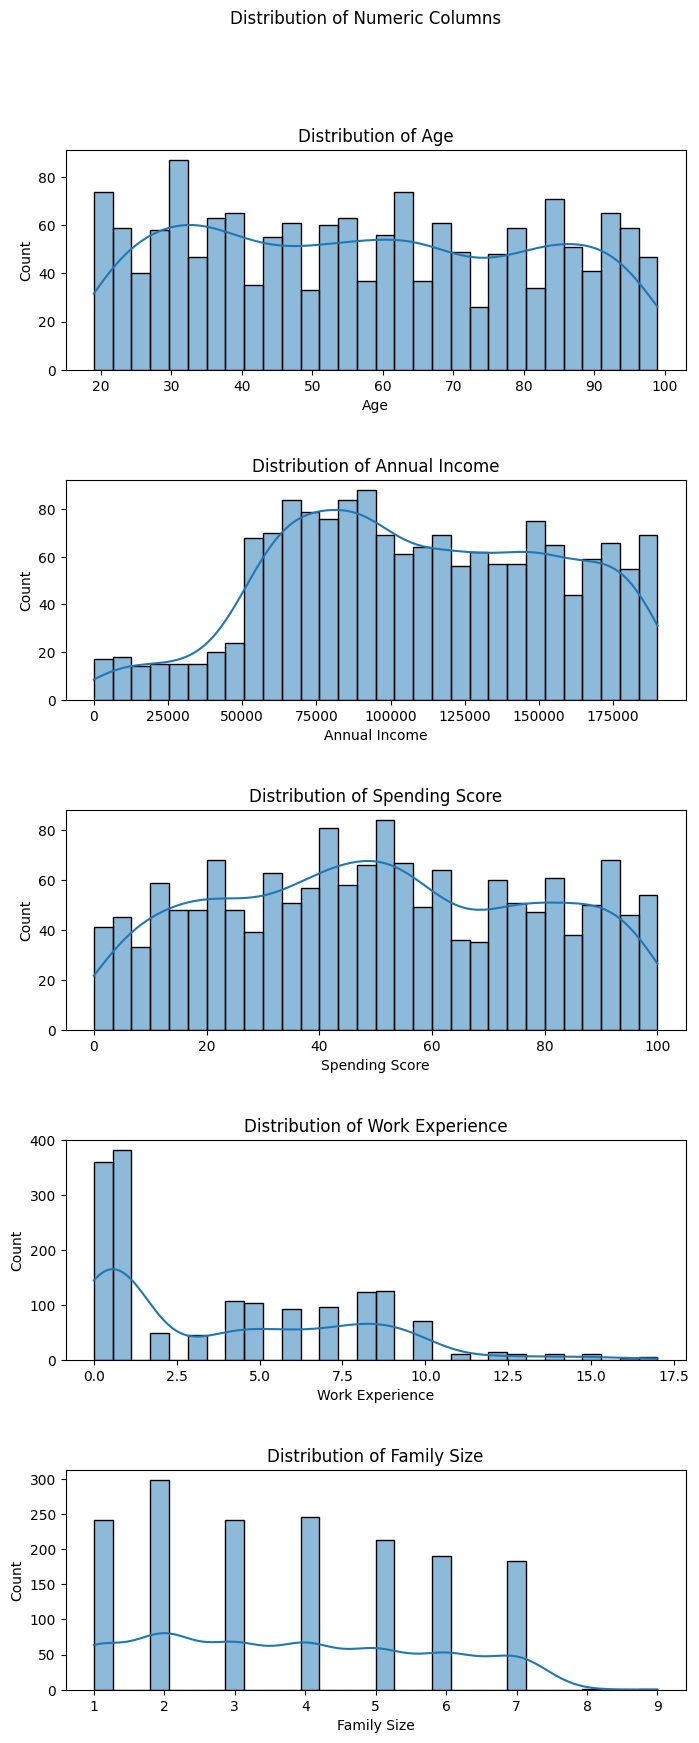

In [17]:
numeric_cols = ['Age', 'Annual Income', 'Spending Score', 'Work Experience', 'Family Size']
df_numeric = df[numeric_cols]

fig, axes = plt.subplots(nrows=len(numeric_cols), figsize=(8, 20))

plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df_numeric, x=col, bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.suptitle('Distribution of Numeric Columns', y=0.95)
plt.show()

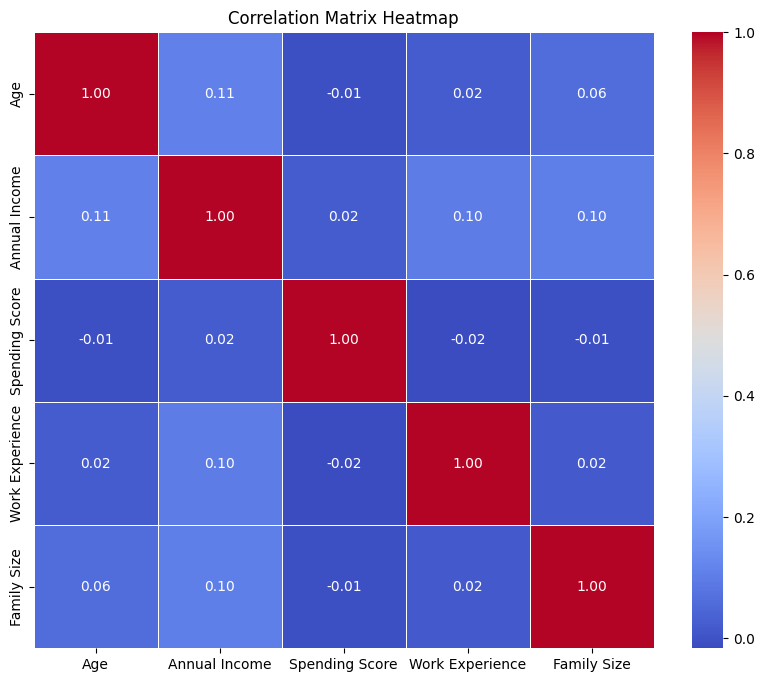

In [18]:
numeric_cols = df.select_dtypes(include='number')

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [21]:
gender_counts = df['Gender'].value_counts()

fig = px.pie(
    gender_counts,
    values=gender_counts,
    names=gender_counts.index,
    labels={'index': 'Gender', 'values': 'Count'},
    title='Gender Proportion',
    color=gender_counts.index,
    color_discrete_map={'Male': 'lightblue', 'Female': 'lightcoral'},
)

fig.update_traces(textinfo='percent+label', pull=[0.1, 0])
fig.show()

In [22]:
fig = px.scatter(df, x='Annual Income', y='Spending Score', color='Gender',
                 title='Income vs Spending Score',
                 labels={'Annual Income': 'Annual Income', 'Spending Score': 'Spending Score', 'Gender': 'Gender'})
fig.show()

In [23]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, float('inf')],
                         labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])
fig = px.box(df, x='Age Group', y='Spending Score', color='Gender',
             title='Spending Score by Age Group',
             labels={'Age Group': 'Age Group', 'Spending Score': 'Spending Score', 'Gender': 'Gender'})
fig.show()

In [24]:
fig = px.box(df, x='Profession', y='Spending Score', color='Gender',
             title='Spending Score by Profession',
             labels={'Profession': 'Profession', 'Spending Score': 'Spending Score', 'Gender': 'Gender'})
fig.show()


In [25]:
fig = px.violin(df, x='Profession', y='Spending Score', color='Gender',
                title='Spending Score Distribution by Profession',
                labels={'Profession': 'Profession', 'Spending Score': 'Spending Score', 'Gender': 'Gender'})
fig.show()

In [26]:
fig = px.scatter(df, x='Work Experience', y='Spending Score', color='Gender',
                 title='Work Experience vs Spending Score',
                 labels={'Work Experience': 'Work Experience', 'Spending Score': 'Spending Score', 'Gender': 'Gender'})
fig.show()

In [27]:
avg_spending_by_experience = df.groupby('Work Experience')['Spending Score'].mean().reset_index()
fig = px.line(avg_spending_by_experience, x='Work Experience', y='Spending Score',
              title='Average Spending Score by Work Experience',
              labels={'Work Experience': 'Work Experience', 'Spending Score': 'Average Spending Score'})
fig.show()

In [28]:
fig = px.scatter(df, x='Family Size', y='Annual Income', color='Gender',
                 title='Family Size vs Annual Income',
                 labels={'Family Size': 'Family Size', 'Annual Income': 'Annual Income', 'Gender': 'Gender'})
fig.show()

In [29]:
fig = px.scatter(df, x='Family Size', y='Spending Score', color='Gender',
                 title='Family Size vs Spending Score',
                 labels={'Family Size': 'Family Size', 'Spending Score': 'Spending Score', 'Gender': 'Gender'})
fig.show()

In [30]:
custom_colors = {'Male': 'red', 'Female': 'blue'}

fig = px.bar(
    df,
    x='Profession',
    color='Gender',
    barmode='group',
    title='Gender Distribution Within Professions',
    color_discrete_map=custom_colors,
)

fig.show()

In [31]:
average_spending_score = df['Spending Score'].mean()
print(f"Average Spending Score: {average_spending_score:.2f}")

Average Spending Score: 50.44


In [32]:
profession_counts = df['Profession'].value_counts()

fig = px.bar(
    profession_counts,
    x=profession_counts,
    y=profession_counts.index,
    orientation='h',
    labels={'y': 'Profession', 'x': 'Count'},
    title='Distribution of Professions',
)

fig.show()

In [33]:
fig = px.box(df, x='Profession', y='Spending Score', color='Gender',
             title='Spending Score by Profession',
             labels={'Profession': 'Profession', 'Spending Score': 'Spending Score', 'Gender': 'Gender'})
fig.show()

In [34]:
high_spending_age_group = df[df['Spending Score'] > df['Spending Score'].mean()]['Age Group'].mode().iloc[0]
print(f"Targeting High-Spending Age Group: {high_spending_age_group}")

Targeting High-Spending Age Group: 60+


In [35]:
gender_promotions = df.groupby('Gender')['Spending Score'].mean()
target_gender = gender_promotions.idxmax()
print(f"Targeting Promotions to Gender: {target_gender}")

Targeting Promotions to Gender: Female


# **Preprocessing**

In [36]:
df['IncomePerMember'] = df['Annual Income'] / df['Family Size']

bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
df['SpendingScoreCategory'] = pd.cut(df['Spending Score'], bins=bins, labels=labels, right=False)

bins = [0, 5, 10, 15, 20]
labels = ['Entry', 'Mid', 'Senior', 'Expert']
df['ExperienceLevel'] = pd.cut(df['Work Experience'], bins=bins, labels=labels, right=False)

df['Income_Experience_Ratio'] = df['Annual Income'] / (1 + df['Work Experience'])

bins_family = [0, 3, 5, float('inf')]
labels_family = ['Small', 'Medium', 'Large']
df['FamilySizeCategory'] = pd.cut(df['Family Size'], bins=bins_family, labels=labels_family, right=False)

In [37]:
df.head()

,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size,Age Group,IncomePerMember,SpendingScoreCategory,ExperienceLevel,Income_Experience_Ratio,FamilySizeCategory
CustomerID,,,,,,,,,,,,,
1,Male,19,15000,39,Healthcare,1,4,0-20,3750.000000,Low,Entry,7500.000000,Medium
2,Male,21,35000,81,Engineer,3,3,21-30,11666.666667,Very High,Entry,8750.000000,Medium
3,Female,20,86000,6,Engineer,1,1,0-20,86000.000000,Very Low,Entry,43000.000000,Small
4,Female,23,59000,77,Lawyer,0,2,21-30,29500.000000,High,Entry,59000.000000,Small
5,Female,31,38000,40,Entertainment,2,6,31-40,6333.333333,Moderate,Entry,12666.666667,Large


# **Modelling**

In [40]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Profession'] = label_encoder.fit_transform(df['Profession'])
df['Age Group'] = label_encoder.fit_transform(df['Age Group'])
df['SpendingScoreCategory'] = label_encoder.fit_transform(df['SpendingScoreCategory'])
df['ExperienceLevel'] = label_encoder.fit_transform(df['ExperienceLevel'])
df['FamilySizeCategory'] = label_encoder.fit_transform(df['FamilySizeCategory'])

numerical_cols = ['Work Experience', 'Family Size', 'IncomePerMember', 'Income_Experience_Ratio', 'Spending Score']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [41]:
df.head()

,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size,Age Group,IncomePerMember,SpendingScoreCategory,ExperienceLevel,Income_Experience_Ratio,FamilySizeCategory
CustomerID,,,,,,,,,,,,,
1,1,19,15000,-0.412606,5,-0.772863,0.130862,0,-1.011774,1,0,-0.841267,1
2,1,21,35000,1.101927,2,-0.258046,-0.380862,1,-0.802158,3,0,-0.812823,1
3,0,20,86000,-1.602595,2,-0.772863,-1.404310,0,1.166024,4,0,-0.033446,2
4,0,23,59000,0.957685,7,-1.030272,-0.892586,1,-0.329971,0,0,0.330642,2
5,0,31,38000,-0.376545,3,-0.515455,1.154310,2,-0.943373,2,0,-0.723697,0


# **Visualisasi Hasil Algoritma**

In [42]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

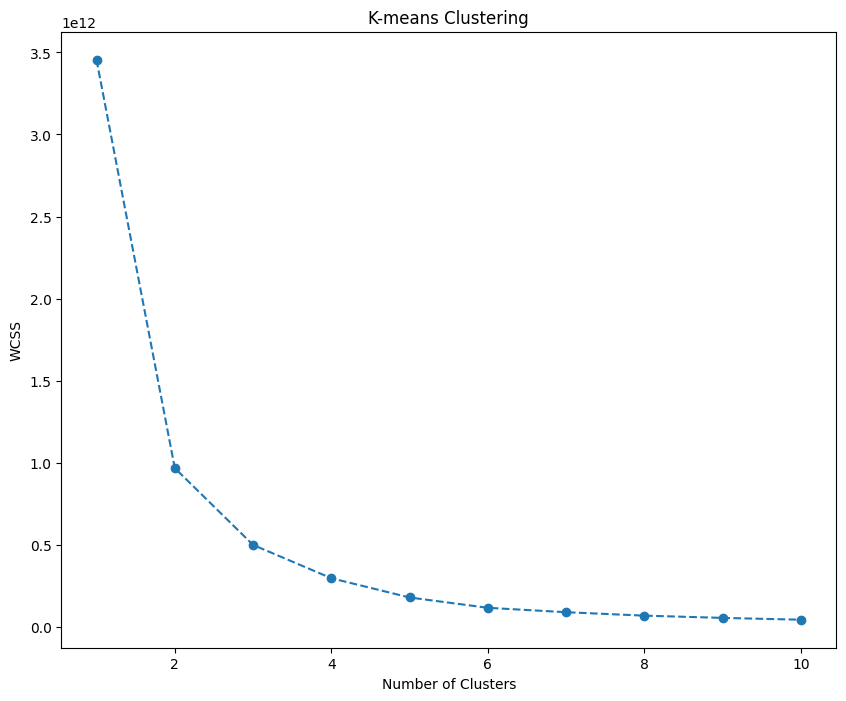

In [43]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [44]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [45]:
kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

In [46]:
df_segm_kmeans = df.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [47]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size,Age Group,IncomePerMember,SpendingScoreCategory,ExperienceLevel,Income_Experience_Ratio,FamilySizeCategory
Segment K-means,,,,,,,,,,,,,
0,0.399635,59.253650,161456.708029,0.040517,2.947080,0.072170,0.099113,3.647810,0.519810,1.965328,0.945255,0.447230,0.885036
1,0.434412,59.151618,104385.386712,-0.016495,2.688245,0.032251,0.020148,3.630324,-0.056528,2.040886,0.943782,-0.043078,0.964225
2,0.372917,53.570833,54295.122917,-0.026084,2.843750,-0.121834,-0.137793,3.302083,-0.524321,1.950000,0.777083,-0.457907,1.075000


In [48]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Gender']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [49]:
df_segm_analysis

,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size,Age Group,IncomePerMember,SpendingScoreCategory,ExperienceLevel,Income_Experience_Ratio,FamilySizeCategory,N Obs,Prop Obs
Segment K-means,,,,,,,,,,,,,,,
0,0.399635,59.253650,161456.708029,0.040517,2.947080,0.072170,0.099113,3.647810,0.519810,1.965328,0.945255,0.447230,0.885036,548,0.339319
1,0.434412,59.151618,104385.386712,-0.016495,2.688245,0.032251,0.020148,3.630324,-0.056528,2.040886,0.943782,-0.043078,0.964225,587,0.363467
2,0.372917,53.570833,54295.122917,-0.026084,2.843750,-0.121834,-0.137793,3.302083,-0.524321,1.950000,0.777083,-0.457907,1.075000,480,0.297214


In [50]:
df_segm_analysis.rename({0:'well-off',
                         2:'fewer-opportunities',
                         1:'standard',})

,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size,Age Group,IncomePerMember,SpendingScoreCategory,ExperienceLevel,Income_Experience_Ratio,FamilySizeCategory,N Obs,Prop Obs
Segment K-means,,,,,,,,,,,,,,,
well-off,0.399635,59.253650,161456.708029,0.040517,2.947080,0.072170,0.099113,3.647810,0.519810,1.965328,0.945255,0.447230,0.885036,548,0.339319
standard,0.434412,59.151618,104385.386712,-0.016495,2.688245,0.032251,0.020148,3.630324,-0.056528,2.040886,0.943782,-0.043078,0.964225,587,0.363467
fewer-opportunities,0.372917,53.570833,54295.122917,-0.026084,2.843750,-0.121834,-0.137793,3.302083,-0.524321,1.950000,0.777083,-0.457907,1.075000,480,0.297214


In [51]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off',
                         2:'fewer-opportunities',
                         1:'standard',})

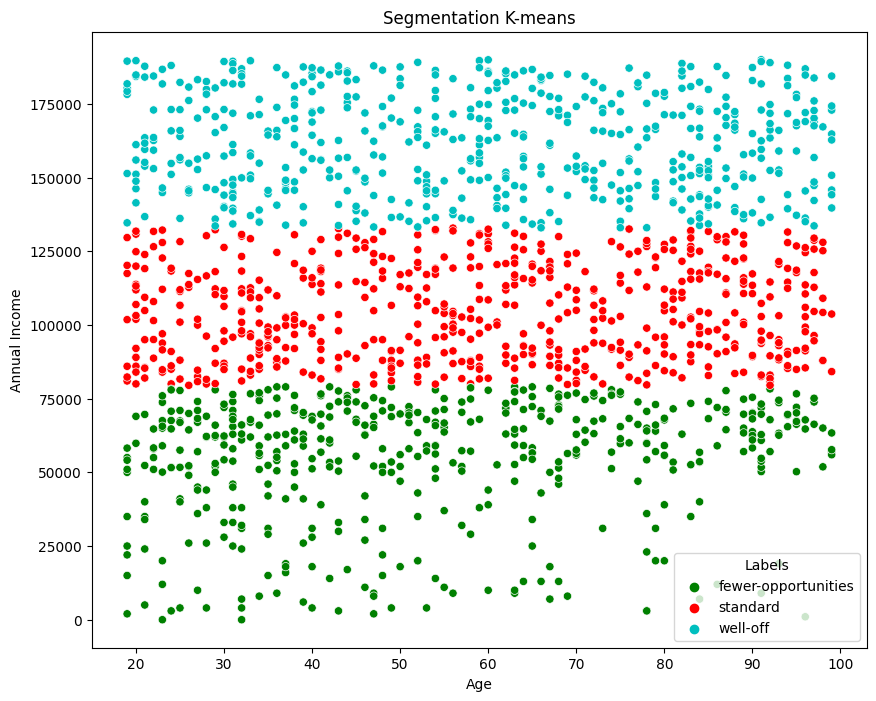

In [52]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Annual Income']

plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_kmeans['Labels'], palette=['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

# **Save Model**

In [53]:
# pickle.dump(scaler, open('scaler.pickle', 'wb'))
# pickle.dump(pca, open('pca.pickle', 'wb'))
# pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))